# 비지도학습과 데이터전처리

###### 스케일조정

1. StandardScaler : 
   - 각 `특성의 평균=0, 분산=1`로 변경, 
   - 최소값/최대값 제한하지 않는다.
1. RobustScaler : 
   - StandardScaler와 유사, 
   - 대신에 `중앙값 median, 4분위 quartile`을 사용
   - 이상치에대해 영향을 별로 받지 않는다.
1. MinMaxScaler
   - 모든 특성들이 `0~1사이의 위치하도록 조정`
1. Normalizer
   - 다른 방식과 매우 다른 조정방법이다.
   - `특성의 벡터의 유클리디안거리가 1`이 되도록 조정
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

#### PCA(주성분분석)

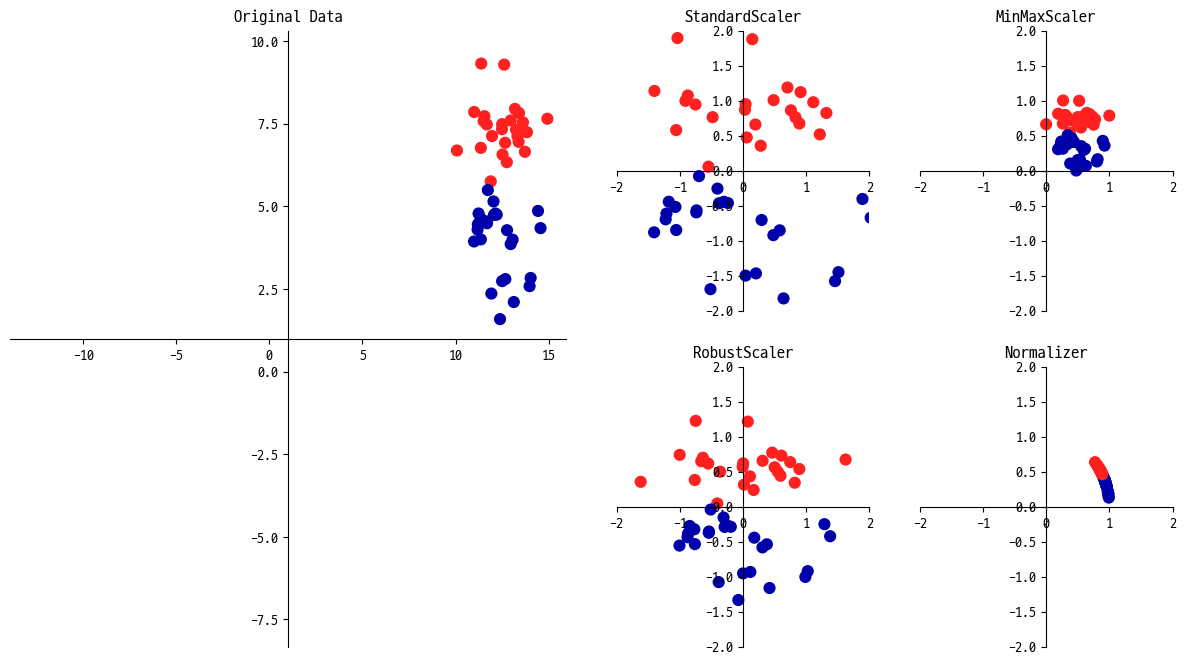

In [3]:
import mglearn
mglearn.plots.plot_scaling()
plt.show()

##### 훈련용과 검증용 데이터셋의 스케일을 동일방법으로 조정하기

* 오리지널데이터의 시각화 vs 조정된 데이터의 시각화 (다를까? 같을까?)

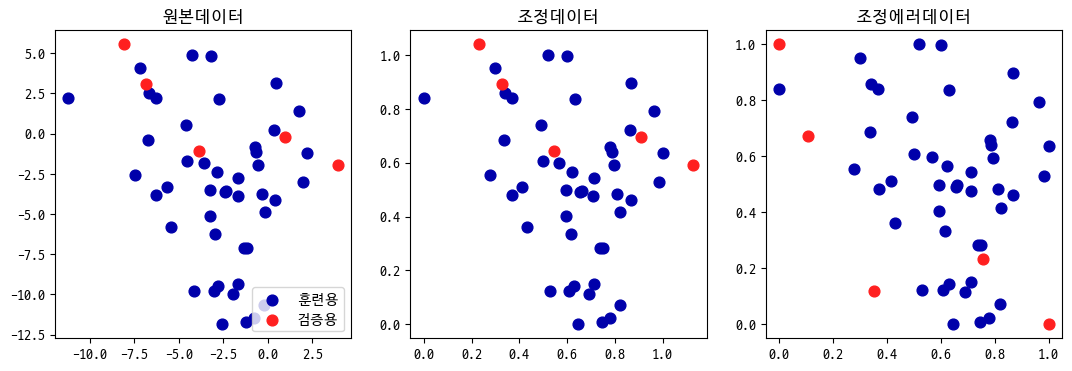

In [30]:
# 오리지널 vs 조정 시각화
X, _ = datasets.make_blobs(n_samples=50, centers=5, random_state=2, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# 시각화
fig, axes = plt.subplots(1,3,figsize=(13,4))

# 1. 원본데이터의 시각화
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0)
                , label='훈련용', s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], c=mglearn.cm2(1)
                , label='검증용', s=60)
axes[0].legend(loc='lower right')
axes[0].set_title('원본데이터')

# 2. 스케일조정후 시각화
scaler = MinMaxScaler().fit(X_train)
X_train_sacled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_sacled[:,0], X_train_sacled[:,1], c=mglearn.cm2(0)
                , label='훈련용', s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=mglearn.cm2(1)
                , label='검증용', s=60)
axes[1].set_title('조정데이터')

# 3. 잘못된 조정후 시각화
test_scaler = MinMaxScaler().fit(X_test)
X_test_scaled_err = test_scaler.transform(X_test)

axes[2].scatter(X_train_sacled[:,0], X_train_sacled[:,1], c=mglearn.cm2(0)
                , label='훈련용', s=60)
axes[2].scatter(X_test_scaled_err[:,0], X_test_scaled_err[:,1], c=mglearn.cm2(1)
                , label='검증용', s=60)
axes[2].set_title('조정에러데이터')

plt.show()

In [31]:
# 1. 유방암셋 - minmax조정
from sklearn import datasets
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = \
    train_test_split(cancer.data, cancer.target, random_state=0)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)  # 훈련
X_train_sacled = scaler.transform(X_train)

# 훈련용
print(f'변환후 데이터 크기 = {X_train.shape}, {X_train_sacled.shape}')
print(f'변환후 데이터 최소 = {X_train.min(axis=0)}, {X_train_sacled.min(axis=0)}')
print(f'변환후 데이터 최대 = {X_train.max(axis=0)}, {X_train_sacled.max(axis=0)}')

변환후 데이터 크기 = (426, 30), (426, 30)
변환후 데이터 최소 = [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02], [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
변환후 데이터 최대 = [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [36]:
# 검증용
X_test_scaled = scaler.transform(X_test)
print(f'변환후 데이터 크기 = {X_test.shape}, {X_test_scaled.shape}')
print(f'변환후 데이터 최소 = {X_test.min(axis=0)}, {X_test_scaled.min(axis=0)}')
print(f'변환후 데이터 최대 = {X_test.max(axis=0)}, {X_test_scaled.max(axis=0)}')

변환후 데이터 크기 = (143, 30), (143, 30)
변환후 데이터 최소 = [7.729e+00 1.072e+01 4.798e+01 1.788e+02 6.576e-02 3.398e-02 0.000e+00
 0.000e+00 1.203e-01 5.024e-02 1.144e-01 3.602e-01 7.714e-01 6.802e+00
 2.826e-03 3.746e-03 0.000e+00 0.000e+00 1.013e-02 1.217e-03 8.964e+00
 1.249e+01 5.717e+01 2.422e+02 8.409e-02 4.619e-02 0.000e+00 0.000e+00
 1.603e-01 5.865e-02], [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
변환후 데이터 최대 = [2.321e+01 3.928e+01 1.535e+02 1.670e+03 1.634e-01 3.454e-01 4.264e-01
 1.823e-01 2.906e-01 9.502e-02 1.370e+00 3.647e+00 1.107e+01 1.765e+02
 3.113e-02 1.354e-01 1.438e-01 4.090e-02 7.895e-02 2.193e-02 3.101e+01
 4.487e+01 2.068e+02 2.944e+03 1.902e-01 9.327e-01 1.170e+00 2

In [37]:
from sklearn.svm import SVC

# 1. 스케일조정전
svm = SVC(C=100).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {svm.score(X_train, y_train):.3f}') 
print(f'검증용데이터셋의 점수 = {svm.score(X_test, y_test):.3f}')
print()

# 2. 스케일조정후
svm = SVC(C=100).fit(X_train_sacled, y_train)
print(f'훈련용데이터셋의 점수 = {svm.score(X_train_sacled, y_train):.3f}') 
print(f'검증용데이터셋의 점수 = {svm.score(X_test_scaled, y_test):.3f}')

훈련용데이터셋의 점수 = 0.941
검증용데이터셋의 점수 = 0.944

훈련용데이터셋의 점수 = 1.000
검증용데이터셋의 점수 = 0.965


In [38]:
# 2. 유방암셋 - StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sacled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 스케일조정후
svm = SVC(C=100).fit(X_train_sacled, y_train)
print(f'훈련용데이터셋의 점수 = {svm.score(X_train_sacled, y_train):.3f}') 
print(f'검증용데이터셋의 점수 = {svm.score(X_test_scaled, y_test):.3f}')

훈련용데이터셋의 점수 = 1.000
검증용데이터셋의 점수 = 0.958


In [39]:
# 3. 유방암셋 - RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)
X_train_sacled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일조정후
svm = SVC(C=100).fit(X_train_sacled, y_train)
print(f'훈련용데이터셋의 점수 = {svm.score(X_train_sacled, y_train):.3f}') 
print(f'검증용데이터셋의 점수 = {svm.score(X_test_scaled, y_test):.3f}')

훈련용데이터셋의 점수 = 1.000
검증용데이터셋의 점수 = 0.951


In [40]:
# 4. 유방암셋 - MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_sacled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일조정후
svm = SVC(C=100).fit(X_train_sacled, y_train)
print(f'훈련용데이터셋의 점수 = {svm.score(X_train_sacled, y_train):.3f}') 
print(f'검증용데이터셋의 점수 = {svm.score(X_test_scaled, y_test):.3f}')

훈련용데이터셋의 점수 = 1.000
검증용데이터셋의 점수 = 0.965


##### 실습. iris 데이터셋
* 데이터스케일조정
* 전체데이터(꽃받힘, 꽃힘) 적용
* SVM(지도), K-means(비지도) 2개의 알고리즘 적용후 훈련용 vs 검증용 점수 출력
* 시각화

0.08928571428571429
검증용세트의 정확도 : 0.974
검증용세트의 정확도 : 0.965


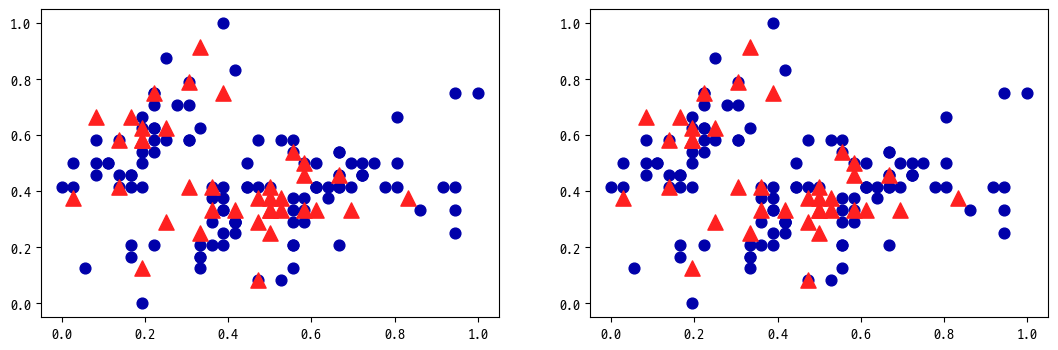

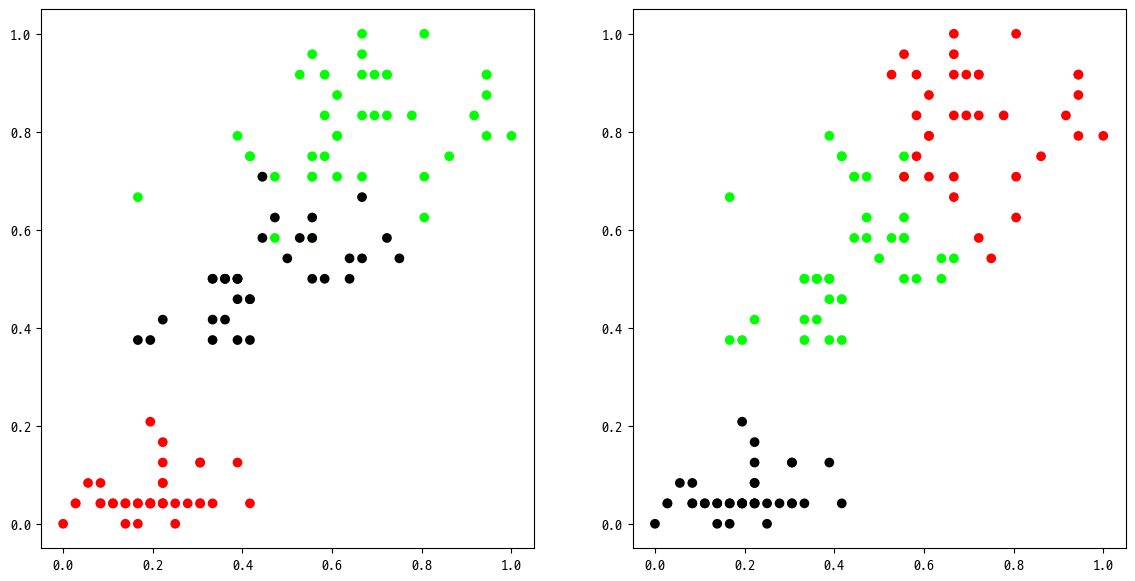

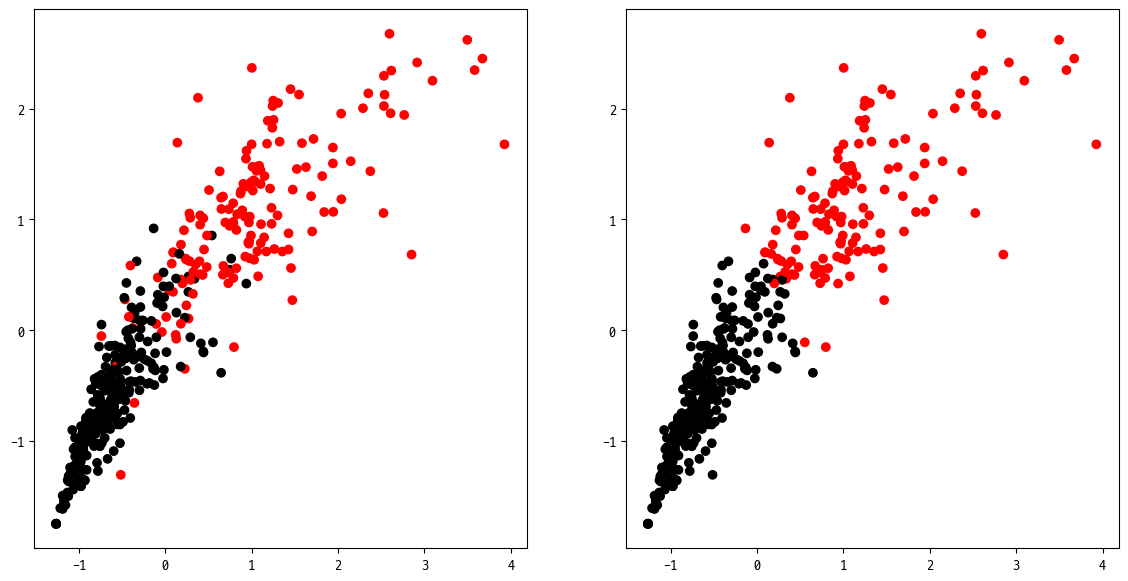

In [55]:
import sklearn.metrics as sm
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)

# iris데이터 전처리 - minmax
scaler = MinMaxScaler().fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

# 전처리 전후 데이터 분포 변화 확인 - 변화 x
fig, axes = plt.subplots(1,2,figsize=(13,4))

axes[0].scatter(x_train_std[:,0],x_train_std[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[0].scatter(x_test_std[:,0],x_test_std[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')

axes[1].scatter(x_train_std[:,0],x_train_std[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[1].scatter(x_test_std[:,0],x_test_std[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')

# k-means - iris데이터는 3개의 종류가 있으서 n_clusters를 3으로 지정
kmeans = KMeans(n_clusters=3).fit(x_train_std)

# 타겟이 다르게 분류된 것을 원래와 같게 분류
predY = np.choose(kmeans.labels_, [0,1,2]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black','lime'])
plt.subplot(1,2,1) # 정답
plt.scatter(x_train_std[:,0],x_train_std[:,3], c= colormap[y_train]) 

plt.subplot(1,2,2) # 예측
plt.scatter(x_train_std[:,0],x_train_std[:,3], c= colormap[predY])

print(sm.accuracy_score(y_train,predY))

svm = SVC(C=100).fit(x_train_std, y_train)

print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test_std, y_test)))

# 유방암데이터
cancer = datasets.load_breast_cancer()
scaler = StandardScaler().fit(cancer.data)
x = scaler.transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(x, cancer.target, random_state = 0)

svm = SVC(C=100).fit(x_train, y_train)
print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test, y_test)))

X = pd.DataFrame(x_train, columns= cancer.feature_names)

x = X.iloc[:,[7, 9, 14, 27]]

kmeans = KMeans(n_clusters=2).fit(x)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[y_train]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[predY])

# 정규분포로 정규화를 했더니 정확도가 더 떨얼